In [1]:
import sys
sys.path.append('/home/elena/astrocosmolib/')

import numpy as np
import matplotlib.pyplot as plt

#import tqdm
from tqdm import tqdm

In [2]:
omegam, chi2 = np.load("chi2_values.npy")
posterior = np.exp(-0.5 * chi2)

In [3]:
from scipy.interpolate import interp1d

interp_chi2 = interp1d(omegam, -0.5*chi2, kind='cubic')

In [4]:
def MCMC(x0, n_steps, x_min, x_max):
    chain = []
    accepted = []
    chi2_chain = []

    chain.append(x0)
    accepted.append(True)
    chi2_chain.append(interp_chi2(x0))

    for i in tqdm(range(n_steps)):
        x_try = np.random.uniform(x_min, x_max)
        f_try = interp_chi2(x_try)
        f_old = interp_chi2(chain[-1])
        log_ratio = f_try - f_old
        log_u = np.log(np.random.uniform())

        if log_u < log_ratio:
            chain.append(x_try)
            accepted.append(True)
            chi2_chain.append(f_try)
        else:   
            chain.append(chain[-1])
            accepted.append(False)
            chi2_chain.append(f_old)
    
    return chain, chi2_chain, accepted

 15%|█▌        | 750/5000 [00:00<00:00, 7494.15it/s]

100%|██████████| 5000/5000 [00:00<00:00, 7454.90it/s]


Acceptance rate:  0.20615876824635074


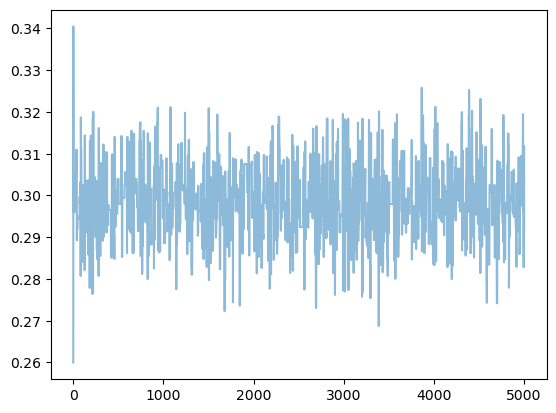

In [5]:
x_min = 0.23
x_max = 0.37
n_steps = 5000
x0 = 0.26

chain, chi2_chain, accepted = MCMC(x0, n_steps, x_min, x_max)

print("Acceptance rate: ", np.sum(accepted) / len(accepted))
plt.plot(chain, alpha=0.5)
plt.show()

In [6]:
#media e std della chain
print("Omega_m: ", np.mean(chain[:1000]), "+/-", np.std(chain[:1000]))

Omega_m:  0.2990663004569128 +/- 0.008809350889875344
